Before writing code in attempt to predicintg the US Presidential Election winner it is important to understand the data. 
Collected Data (All data was sourced from Kaggle): 
- Historical Election Data (2020) 
- Election Polling (2024)
- US President Economic Indicators (1981 - 2021)
- Social Sentiment of Election Candidates (Twitter 2020)

Historically, the race for the presidential election has been amongst two winning parties \bold{Democratics} (D) and \bold{Republicans} (R). Correctly predicitng the election can be challenging, it is even more so when such predictions can be linked to making volatile financial decisions. 

Such decisions can be linked for decidiing : 
1. Market Stability  + Investor confidence -> Stock market reaction, investment startegies 
2. Secotor-Specific Imapcts ( Health, Energy, ...)
3. Regulatorty Changes, Corporate Tax Policies, Tariffs and Trade Policies 
4. Impact on consumptions (interest rates (mortages, loans, bonds))+ Job Market (umemployement rate)


Before creating ML and DeepLearning Models it is important to conduct Explaratory Data Analysis (EDA) to better understand the structure of the data you are working with, idenitfying relationships, patterns, outliers and anomalies, to ultimately imporve model performance and reliable results.


Penultimate step EDA: 
### 1) Data Cleaning/Restructure

In [80]:
import pandas as pd
pd.set_option('display.max_columns', 200)
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

1) US Economy President KPI ( Key Performance Indicator ) dataset

In [81]:
df_economy = pd.read_csv("Data/USA Economy Growth.csv", encoding='ISO-8859-1') 
df_economy.head()

# reorder the csv file columns for better reading
new_order = ['Presidents', 'Year'] + list(df_economy.columns[2:9])
df_economy = df_economy.reindex(columns = new_order) 

# Name does not matter, what matters is the party the president represents 
print(df_economy['Presidents'].describe())
names = df_economy['Presidents'].unique()
print(names)


df_economy['Presidents'] = df_economy['Presidents'].replace({'Ronald Reagan':'rep', 'George Bush':'rep', 'Bill Clinton':'dem', 'George W. Bush':'rep', 'Barack Obama':'dem', 'Donald Trump':'rep', 'Joe Biden':'dem'})
df_economy.tail()



count                43
unique                7
top       Ronald Reagan
freq                  8
Name: Presidents, dtype: object
['Ronald Reagan' 'George Bush' 'Bill Clinton' 'George W. Bush'
 'Barack Obama' 'Donald Trump' 'Joe Biden']


,Presidents,Year,GDP per capita (in US$ PPP),GDP (in Bil. US$nominal),GDP per capita (in US$ nominal),GDP growth %,Inflation rate %,Unemployment %,Government debt (in % of GDP)
38,rep,2019,65077.3,21381.0,65077.3,2.30%,1.80%,3.70%,108.80%
39,rep,2020,63577.3,21060.5,63577.3,-2.80%,1.20%,8.10%,133.40%
40,dem,2021,70159.8,23315.1,70159.8,5.90%,4.70%,5.40%,126.40%
41,dem,2022,76348.5,25464.5,76348.5,2.10%,8.00%,3.60%,121.70%
42,dem,2023,80034.6,26854.6,80034.6,1.60%,4.50%,3.80%,122.20%


In [82]:
df_economy.isna().sum()

Presidents                         0
Year                               0
GDP per capita (in US$ PPP)        0
GDP (in Bil. US$nominal)           0
GDP per capita (in US$ nominal)    0
GDP growth %                       0
Inflation rate %                   0
Unemployment %                     0
Government debt (in % of GDP)      0
dtype: int64

dont need to worry about an incomplete dataset. 

The dataset is quite concise, and all the columns are KPI of how each president performed economically for the nation since such KPIs are used to deteremine economic health, growth potential and stability. 

2. Election Polling 

In [83]:
df_polling = pd.read_csv("Data/ElectionPollingData2024.csv", encoding = 'ISO-8859-1')

df_polling.shape
df_polling.dtypes
df_polling.describe()

,poll_id,pollster_id,pollster_rating_id,numeric_grade,pollscore,transparency_score,state,sponsor_candidate_id,sponsor_candidate,sponsor_candidate_party,question_id,sample_size,source,race_id,cycle,seat_number,dem,rep,ind
count,616.000000,616.000000,616.000000,576.000000,576.000000,239.000000,0.0,0.0,0.0,0.0,616.000000,608.000000,0.0,616.0,616.0,0.0,616.000000,616.000000,0.0
mean,84598.071429,1060.521104,280.863636,1.912674,-0.226910,6.083682,NaN,NaN,NaN,NaN,185224.313312,4064.430921,NaN,9549.0,2024.0,NaN,44.544903,43.834416,NaN
std,1564.734963,433.561353,166.227147,0.668623,0.736635,2.727718,NaN,NaN,NaN,NaN,9594.481417,3043.419823,NaN,0.0,0.0,NaN,2.017888,2.248153,NaN
min,81694.000000,194.000000,37.000000,0.500000,-1.300000,1.000000,NaN,NaN,NaN,NaN,165625.000000,500.000000,NaN,9549.0,2024.0,NaN,36.000000,35.000000,NaN
25%,83517.750000,568.000000,218.000000,1.800000,-0.600000,4.000000,NaN,NaN,NaN,NaN,179127.750000,1100.000000,NaN,9549.0,2024.0,NaN,43.000000,43.000000,NaN
50%,83671.500000,1189.000000,218.000000,1.800000,-0.200000,6.000000,NaN,NaN,NaN,NaN,179281.500000,2012.500000,NaN,9549.0,2024.0,NaN,45.000000,43.000000,NaN
75%,85911.000000,1189.000000,385.000000,2.400000,-0.200000,9.000000,NaN,NaN,NaN,NaN,191983.250000,7439.000000,NaN,9549.0,2024.0,NaN,46.000000,45.015000,NaN
max,87791.000000,1888.000000,861.000000,3.000000,1.700000,10.000000,NaN,NaN,NaN,NaN,206110.000000,8753.000000,NaN,9549.0,2024.0,NaN,52.000000,52.000000,NaN


In [84]:
print(df_polling.shape)
print(df_polling.columns.unique())
df_polling.isnull().sum()

(616, 41)
Index(['poll_id', 'pollster_id', 'pollster', 'sponsor_ids', 'sponsors',
       'display_name', 'pollster_rating_id', 'pollster_rating_name',
       'numeric_grade', 'pollscore', 'methodology', 'transparency_score',
       'state', 'start_date', 'end_date', 'sponsor_candidate_id',
       'sponsor_candidate', 'sponsor_candidate_party', 'question_id',
       'sample_size', 'population', 'subpopulation', 'population_full',
       'tracking', 'created_at', 'notes', 'url', 'source', 'internal',
       'partisan', 'race_id', 'cycle', 'office_type', 'seat_number',
       'seat_name', 'election_date', 'stage', 'nationwide_batch', 'dem', 'rep',
       'ind'],
      dtype='object')


poll_id                      0
pollster_id                  0
pollster                     0
sponsor_ids                423
sponsors                   423
display_name                 0
pollster_rating_id           0
pollster_rating_name         0
numeric_grade               40
pollscore                   40
methodology                 30
transparency_score         377
state                      616
start_date                   0
end_date                     0
sponsor_candidate_id       616
sponsor_candidate          616
sponsor_candidate_party    616
question_id                  0
sample_size                  8
population                   0
subpopulation              615
population_full              0
tracking                   347
created_at                   0
notes                      610
url                          0
source                     616
internal                   596
partisan                   543
race_id                      0
cycle                        0
office_t

In [85]:
df_polling.loc[0:10,['state']]

,state
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN


it seems like this dataset for the election polling focuses on nation wide representation of the preferred electoral office thus the state column has been omitted. -> This can be drooped. 

In [86]:
# dropped the state column, but the code is left here for reference 
#df_polling.drop(columns='state', axis=1, inplace=True)
#print(df_polling.columns.unique()) --> proof

What columns should be kept? 

Poll Results -> are they Democratic, Republican, or Independent 

Pollster Information -> pollster, pollscore, pollster_rating_name 
(reliability and grading of a pollster )

race_id -> 


Is pollster information really important? lets crete a probability distribution chart for the numeric grade that exsists, becuase this number reflects the accuracy and the quality of the polls. 
A higher numeric grade indicates that the pollster has a strong track record of accurately predicting election results.

Transparency score? this can be evaluated after seeing the numeric grade distribtuon (if there is one). 

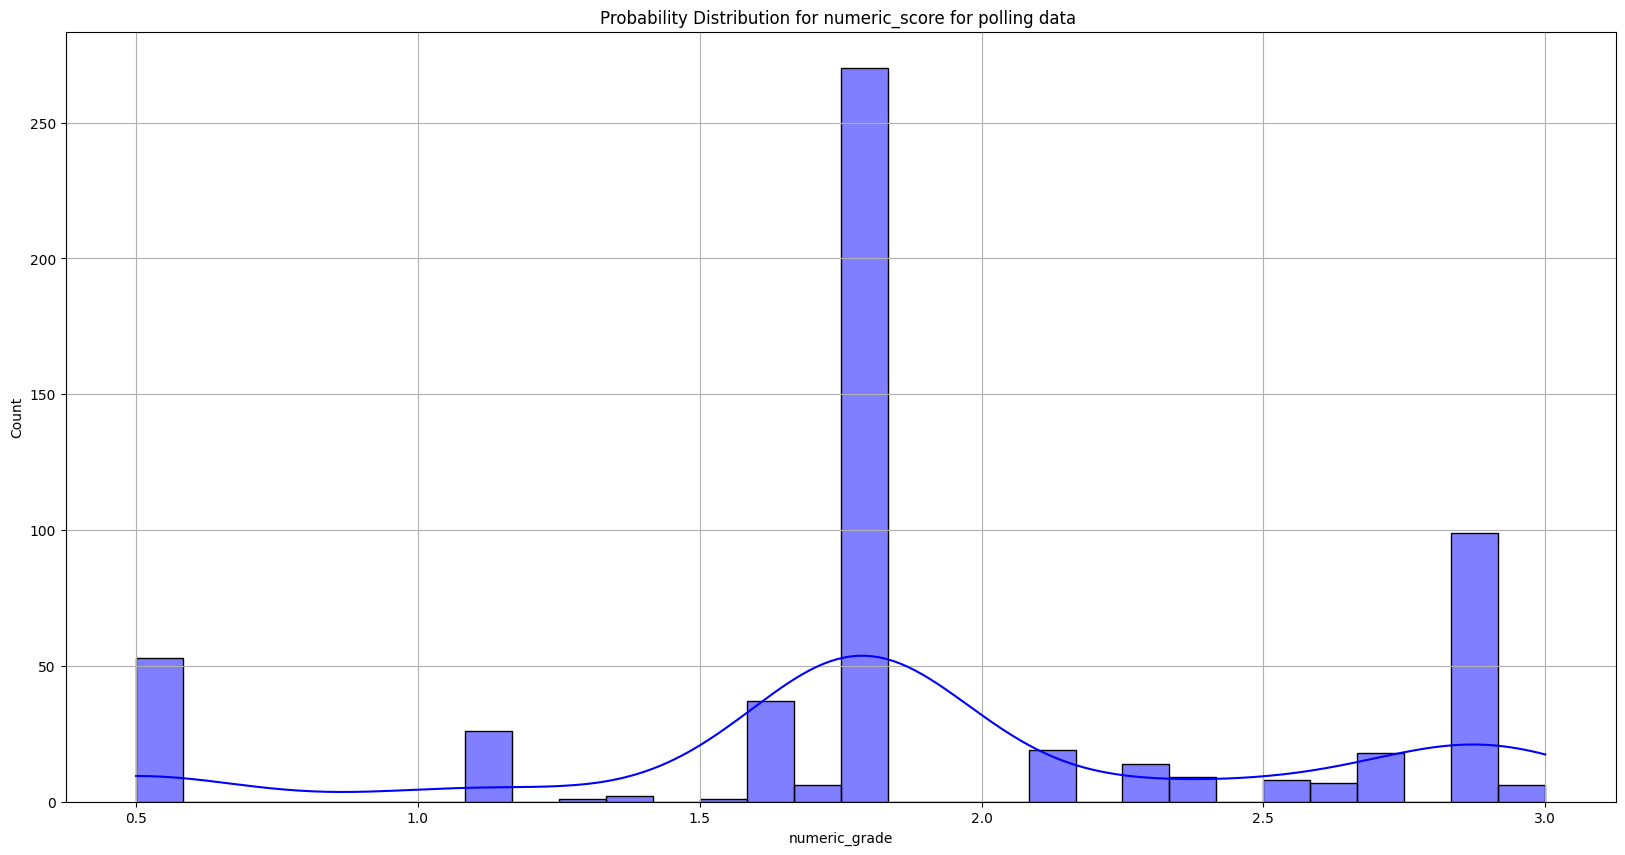

In [87]:
plt.figure(figsize=(20,10))
sns.histplot(df_polling['numeric_grade'], kde=True, bins=30, color = 'blue')
plt.title('Probability Distribution for numeric_score for polling data ')
plt.grid(True)

Numeric Score: 

- Excellent Pollsters: Scores in the 3.5 to 5.0 range
- Good Pollsters: Scores in the 2.5 to 3.5 range
- Average Pollsters: Scores in the 1.5 to 2.5 range
- Below Average Pollsters: Scores below 1.5

Thus, taking the poll results by pollsters who have a numeric_score of 1.75 or above will be a representation of reliable results and since majority of the data comes from that section it should be suitable. 

Is this considered overfitting? 

we will create a new DataFrame with these columns: 

poll_results, numeric_score, race_id, population 

In [88]:
#df_polling['ind'].isnull().sum() --> show that the ind had no data and was safe to remove
# the entire poll results for independent are empty so they can be dropped. 

In [89]:
new_columns = ['numeric_grade', 'transparency_score', 'population','subpopulation','population_full', 'dem','rep'] 
#df_polling['race_id'].unique()
df_polling = df_polling.loc[: , new_columns] 
print(df_polling)


     numeric_grade  transparency_score population subpopulation  \
0              2.9                 7.0         lv           NaN   
1              2.9                 9.0         rv           NaN   
2              2.9                 9.0         rv           NaN   
3              2.1                 4.0         lv           NaN   
4              2.9                 9.0         rv           NaN   
..             ...                 ...        ...           ...   
611            1.8                 NaN         rv           NaN   
612            1.8                 NaN         rv           NaN   
613            1.8                 NaN         rv           NaN   
614            1.8                 NaN         rv           NaN   
615            1.8                 NaN         rv           NaN   

    population_full   dem   rep  
0                lv  47.5  45.5  
1                rv  45.0  44.0  
2                rv  48.0  46.0  
3                lv  46.4  47.1  
4                rv  45.0

Remove subpopulation it is empty, remove LV (likely voters) and keep RV (registered voters) since they are less predicitve then LV. But would this be overfitting? 

In [90]:
df_polling.drop(columns='subpopulation')

,numeric_grade,transparency_score,population,population_full,dem,rep
0,2.9,7.0,lv,lv,47.5,45.5
1,2.9,9.0,rv,rv,45.0,44.0
2,2.9,9.0,rv,rv,48.0,46.0
3,2.1,4.0,lv,lv,46.4,47.1
4,2.9,9.0,rv,rv,45.0,44.0
...,...,...,...,...,...,...
611,1.8,NaN,rv,rv,47.0,44.0
612,1.8,NaN,rv,rv,48.0,44.0
613,1.8,NaN,rv,rv,48.0,44.0
614,1.8,NaN,rv,rv,48.0,44.0


In [91]:
lv_rv_counts = df_polling['population'].value_counts()

labels = lv_rv_counts.index # ['lv', 'rv']
size = lv_rv_counts.values # the counts of each catergoty 

# PIE CHART 

#plt.pie(size, labels = labels,  autopct='%1.1f%%', startangle=90, colors=['green', 'orange','red'] )
#plt.title("RV (Registered Voters) vs LV (Likely Voters)")
#plt.axis()

Majority of the voters are RV so lets keep the LV with the assumptions that if they participated for the polls then they will participate in the election. 

In [92]:
print(df_polling['dem'].unique())
print(df_polling['rep'].unique())

[47.5  45.   48.   46.4  47.   44.   52.   46.   46.6  42.7  43.7  41.
 39.   43.5  44.5  43.   42.   44.4  43.3  43.63 44.6  42.9  49.   39.9
 46.8  45.2  50.   43.46 43.9  44.2  41.58 45.4  45.6  42.8  43.2  45.5
 44.7  44.3  42.3  39.8  40.6  45.1  38.9  41.4  41.8  36.   42.75 41.9
 40.   41.2  41.1  42.87 42.6  40.9  42.54 44.1  51.   44.8  38.   39.5
 40.7  40.3  41.3  43.1  42.4  42.1  43.06 41.57 43.6  40.1  44.9  46.3 ]
[45.5  44.   46.   47.1  45.   47.   48.   45.2  42.   52.   42.4  43.7
 41.   49.   43.   45.1  43.1  43.98 47.3  47.5  41.9  38.1  45.3  45.08
 44.8  46.1  50.   40.1  43.77 46.6  51.   49.2  43.6  44.1  43.4  40.
 47.9  43.9  42.9  44.2  46.9  36.3  39.   44.01 47.6  46.8  41.4  42.8
 44.5  46.7  46.3  45.06 45.9  44.59 46.2  44.4  38.   48.1  45.79 41.3
 35.   45.6  46.78 49.1  44.83 48.7  46.5  46.4  42.81 48.4  36.   45.8
 45.4  37.   42.2 ]


### 2) EDA ( Explatory Data Analysis)

In [98]:
df_economy.head(n=10)
df_economy['Inflation rate %'] = df_economy['Inflation rate %'].str.rstrip('%').astype(float)
df_economy['GDP growth %'] = df_economy['GDP growth %'].str.rstrip('%').astype(float)
df_economy['Unemployment %'] = df_economy['Unemployment %'].str.rstrip('%').astype(float)

<Axes: xlabel='Year', ylabel='Inflation rate %'>

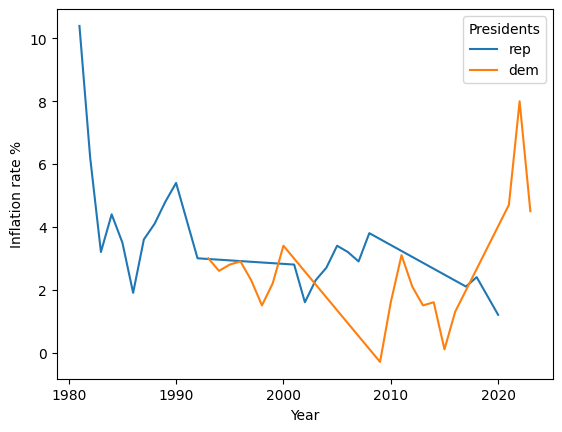

In [99]:

sns.lineplot(data=df_economy, x='Year', y='Inflation rate %', hue='Presidents')

<Axes: xlabel='Year', ylabel='Inflation rate %'>

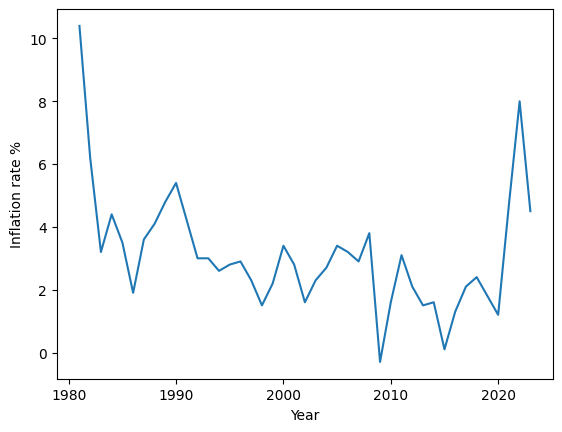

In [100]:
sns.lineplot(data=df_economy, x='Year', y='Inflation rate %')


<Axes: xlabel='Year', ylabel='GDP growth %'>

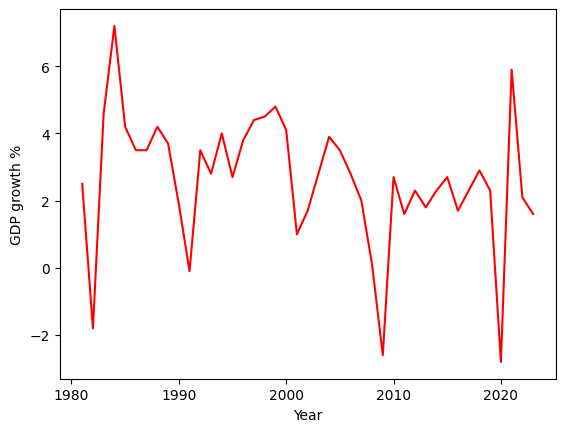

In [101]:
sns.lineplot(data=df_economy, x='Year', y='GDP growth %', color = 'red')